In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

### Extracting data for Analysis

In [2]:
df = pd.read_csv('Uber Request Data.csv')
df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
Request id           6745 non-null int64
Pickup point         6745 non-null object
Driver id            4095 non-null float64
Status               6745 non-null object
Request timestamp    6745 non-null object
Drop timestamp       2831 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 316.2+ KB


## Data Cleaning
#### Our Analysis mainly depends on 'Pickup point', 'Status', 'Request timestamp'. There are no null values in these columns. So the data is good for our analysis. But there are two columns which have null values. Lets see if these are valid.

In [4]:
# Status for the rows where driver id is null
print(df.loc[df['Driver id'].isnull()]['Status'].unique())
# Status for the rows where drop time is null
print(df.loc[df['Drop timestamp'].isnull()]['Status'].unique())

['No Cars Available']
['Cancelled' 'No Cars Available']


#### From above it clear that driver id is null only when status is 'No cars Available' -> which is true and is expected.Drop time stamp' is null only for the trips 'cancelled' or 'No cars Available' -> Which is true and is expected.
###  From above, the data given is awesome and it does not have any missing data. The Null values in the data are valid, but datatype of Driver id should be integer instead of float. Similarly changing time columns to datatime format helps in doing time series analysis easily.

In [5]:
df['Request timestamp'] = pd.to_datetime(df['Request timestamp'],dayfirst=True)
df['Drop timestamp'] = pd.to_datetime(df['Drop timestamp'],dayfirst=True)
df['Driver id'].fillna(0,inplace=True)
df['Driver id'] = df['Driver id'].apply(lambda x: int(x))

In [6]:
df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00
1,867,Airport,1,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00
2,1807,City,1,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00
3,2532,Airport,1,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00
4,3112,City,1,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47


#### Lets check where the demand for cabs is more in 'City' or 'Airport' ?

In [7]:
df['Pickup point'].value_counts()

City       3507
Airport    3238
Name: Pickup point, dtype: int64

#### Requests from city is 3507, Request from Airport is 3238. Demand is almost same in both Airport and City.

# Data Analysis
# How Demand is varying with the day of week and time of the day?

In [8]:
# Lets get date, time, day, and hour at which request received from datestamp column
df['Request time'] = df['Request timestamp'].dt.time
df['Request date'] = df['Request timestamp'].dt.date
df['Request day'] = df['Request timestamp'].dt.weekday_name
df['Request hour']= df['Request timestamp'].dt.hour
df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request time,Request date,Request day,Request hour
0,619,Airport,1,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,11:51:00,2016-07-11,Monday,11
1,867,Airport,1,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,17:57:00,2016-07-11,Monday,17
2,1807,City,1,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,09:17:00,2016-07-12,Tuesday,9
3,2532,Airport,1,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,21:08:00,2016-07-12,Tuesday,21
4,3112,City,1,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,08:33:16,2016-07-13,Wednesday,8


[datetime.date(2016, 7, 11) datetime.date(2016, 7, 12)
 datetime.date(2016, 7, 13) datetime.date(2016, 7, 14)
 datetime.date(2016, 7, 15)]
['Monday' 'Tuesday' 'Wednesday' 'Thursday' 'Friday']


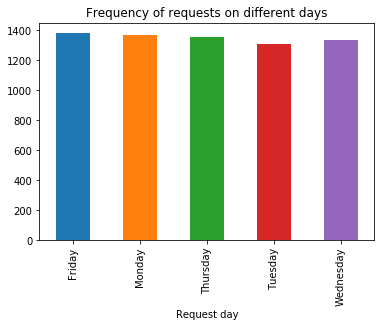

In [9]:
print(df['Request date'].unique())
print(df['Request day'].unique())
df.groupby('Request day')['Request id'].count().plot(kind='bar',title='Frequency of requests on different days');

#### Data is given only for five days and the demand is almost same on all days

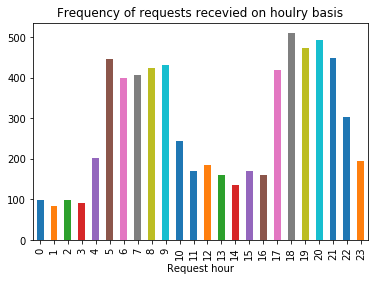

In [10]:
df.groupby('Request hour')['Request id'].count().plot(kind='bar',title='Frequency of requests recevied on houlry basis');

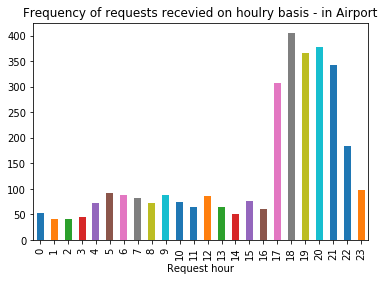

In [11]:
df[df['Pickup point'] == 'Airport'].groupby('Request hour')['Request id'].count().plot(kind='bar',title="Frequency of requests recevied on houlry basis - in Airport");

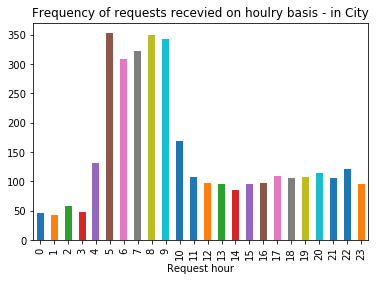

In [12]:
df[df['Pickup point'] == 'City'].groupby('Request hour')['Request id'].count().plot(kind='bar',title="Frequency of requests recevied on houlry basis - in City");

#### Demand for cabs is more in the early morning time(5am - 10am) and in the evening(5pm - 10pm).  In Airport demand is more in the evening (5pm - 10pm). In City demand is more in morning(5am - 10am). This indicates there are more incoming flights to airport in the evening and there are more outgoing flights in the morning.

# How many trips got completed/cancelled/ended with cars unavailability?

Trips completed     : 2831
No Cars Available   : 2650
Cancelled by driver : 1264
Percentage of Trips completed succesfully : 41.971830985915496
Percentage of cars unavailability         : 39.288361749444036


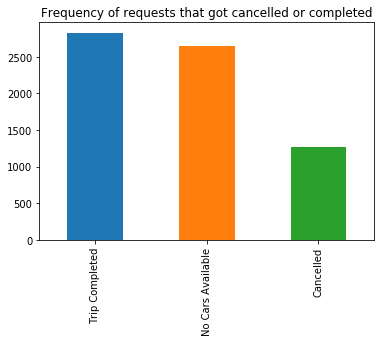

In [13]:
df['Status'].value_counts().plot(kind='bar', title= 'Frequency of requests that got cancelled or completed')

Trips_Completed = df[df['Status'] == 'Trip Completed'].count()[1]
No_Cars = df[df['Status'] == 'No Cars Available'].count()[1]
Cancelled = df[df['Status'] == 'Cancelled'].count()[1]

per_trips_completed = (Trips_Completed/(Trips_Completed+No_Cars + Cancelled)) * 100
per_no_cars = (No_Cars/(Trips_Completed+No_Cars + Cancelled)) * 100

print('Trips completed     : ' + str(Trips_Completed))
print('No Cars Available   : ' + str(No_Cars))
print('Cancelled by driver : ' + str(Cancelled))
print('Percentage of Trips completed succesfully : ' + str(per_trips_completed))
print('Percentage of cars unavailability         : ' + str(per_no_cars))

#### Percentage of trips completed is only 42 percent of requests received. UBER is facing problems with 'No cars availability' as 40 percent of requests ended with 'No cars Available'. 18 percent of requests were cancelled by drivers.
#### Uber is not able to meet the demand due to 'No cars Avalibility' and 'Driver Cancellation'.

# Is the problem of 'Driver cancellation' and 'No cars Availablility' is same in Airport and City?

Pickup point       Airport  City
Status                          
Cancelled              198  1066
No Cars Available     1713   937
Trip Completed        1327  1504
 
Percentage of requests completed from Airport : 40.98208770846201
Percentage of requests completed from City    : 42.88565725691475


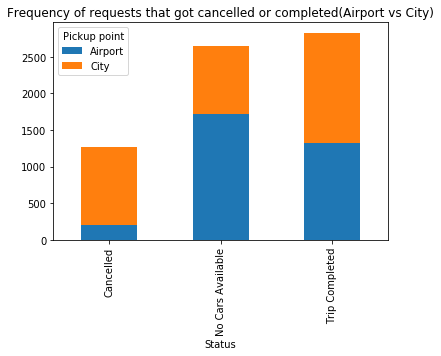

In [14]:
# Trips from Airport
Trips_Completed_air = df[(df['Status'] == 'Trip Completed') & (df['Pickup point'] == 'Airport')].count()[1]
No_Cars_air = df[(df['Status'] == 'No Cars Available') & (df['Pickup point'] == 'Airport')].count()[1]
Cancelled_air = df[(df['Status'] == 'Cancelled') & (df['Pickup point'] == 'Airport')].count()[1]

per_trips_completed_air = (Trips_Completed_air/(Trips_Completed_air+No_Cars_air + Cancelled_air)) * 100

# Trips from city
Trips_Completed_city = df[(df['Status'] == 'Trip Completed') & (df['Pickup point'] == 'City')].count()[1]
No_Cars_city = df[(df['Status'] == 'No Cars Available') & (df['Pickup point'] == 'City')].count()[1]
Cancelled_city = df[(df['Status'] == 'Cancelled') & (df['Pickup point'] == 'City')].count()[1]

per_trips_completed_city = (Trips_Completed_city/(Trips_Completed_city+No_Cars_city + Cancelled_city)) * 100

print(df.groupby(['Status','Pickup point'])['Status'].count().unstack('Pickup point'))
print(' ')
print('Percentage of requests completed from Airport : ' + str(per_trips_completed_air))
print('Percentage of requests completed from City    : ' + str(per_trips_completed_city))
df.groupby(['Status','Pickup point'])['Status'].count().unstack('Pickup point').plot(kind='bar', stacked=True, title="Frequency of requests that got cancelled or completed(Airport vs City)");

#### Percentage of trips completed is almost same from city and airport. The problem is there in both Airport and in city. But the reason for not meeting demand is not same in Airport and city. In city most of the requests are cancelled by drivers and in Airport the requests cancelled by drivers are minumum. In airport 'No car availability' is more than in city.
#### The Above graph shows 'No Cars Available' is more frequent in Airport. Most of the drivers dont want to go to airport and are not accepting the drive to airport from city. This may be the reason for showing 'No Cars Available' in airport.
## Lets check the demand vs supply across different time slots

In [15]:
# creating new dataframe for doing demand vs supply analysis with required fields only
df_time = df[['Pickup point','Status','Request time','Request hour']]
df_time.head()

,Pickup point,Status,Request time,Request hour
0,Airport,Trip Completed,11:51:00,11
1,Airport,Trip Completed,17:57:00,17
2,City,Trip Completed,09:17:00,9
3,Airport,Trip Completed,21:08:00,21
4,City,Trip Completed,08:33:16,8


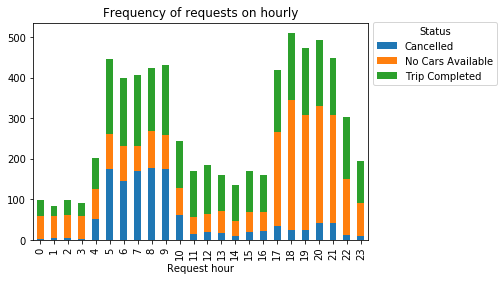

In [16]:
ax=df_time.groupby(['Status','Request hour']).size().unstack('Status').plot(kind='bar',stacked=True, title='Frequency of requests on hourly')
ax.legend(title='Status',loc='lower left',bbox_to_anchor=(1.0, 0.69));

#### In the morning time 5am to 10am drivers are cancelling the requests and 'No car availablility' is not very much when compared to 'Cancelled' during this period. We have already seen that cancellation problem is more in city. From this trend we can say that most of the drivers dont want to go to Airport early in the morning.
#### In the afternoon 5pm to 10pm, 'No car Availability' is higher and 'Driver Cancellation' is minimum.We have already seen that the demand for the ride to Airport in minimum in afternoon and no cars are going to airport in that time. So there are no cars available in evening time at the airport.

## Lets check the above trend seperatley in Airport and in City to confirm our analysis is true

In [17]:
df['journey_time'] = (df['Drop timestamp'] - df['Request timestamp']).dt.total_seconds()/60
df['journey_time'].mean()

52.413752502060596

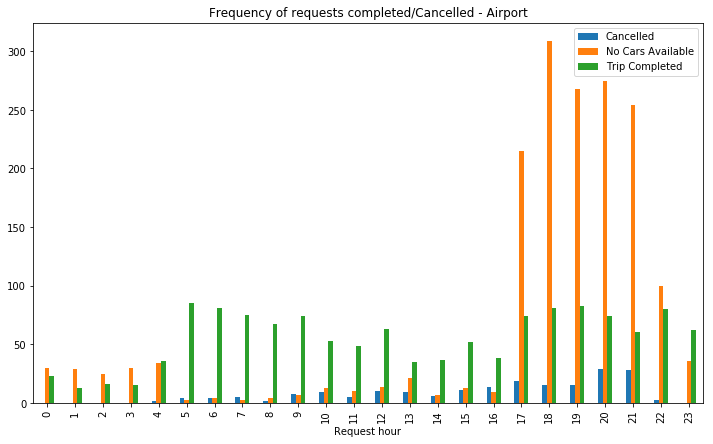

In [18]:
df_time.groupby(['Pickup point','Status','Request hour']).size().unstack(['Pickup point','Status'])['Airport'].rename_axis([None],axis=1).plot(kind='bar',figsize=(12,7),title="Frequency of requests completed/Cancelled - Airport");

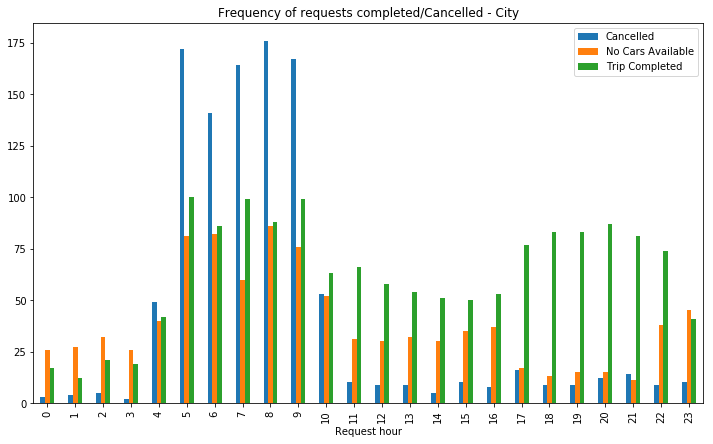

In [19]:
df_time.groupby(['Pickup point','Status','Request hour']).size().unstack(['Pickup point','Status'])['City'].rename_axis([None],axis=1).plot(kind='bar',figsize=(12,7),title="Frequency of requests completed/Cancelled - City");

#### In Airport the trend clearly says there is huge difference in demand and supply from 5pm to 10pm. 'No cars are avalaible' at this time. (The average time taken to reach airport is 50mins).There are no requests to airport from city before this period(after noon) which may be the reason for cars unavailbility. This tells that there are more incoming flights to airport in that period and minimum number of outgoing flights.

#### This is also the reason for drivers to cancel requests to airport in the morning as there are no incoming flights in the afternoon which is difficult for cabs drivers to get return trip.

#### The 'Non availablity of cars' in the city is also more in the morning 5am to 10am is almost equal to rides completed. The drivers should be encoraged to start their trips early in the morning to meet some demand.


## Analysing the above trend with demand and supply values

##### Demand - Total number of requests received, Supply - Total number of trips completed

In [20]:
# Creating new dataframe with demand and supply values
df_demand_supply = df_time.groupby(['Status','Request hour']).size().unstack('Status').rename_axis([None],axis=1).reset_index()
df_demand_supply['demand'] = df_demand_supply['Cancelled'] + df_demand_supply['No Cars Available'] + df_demand_supply['Trip Completed']
df_demand_supply['demand supply gap'] = df_demand_supply['demand'] - df_demand_supply['Trip Completed'] 
df_demand_supply['demand supply gap%'] = round((df_demand_supply['demand supply gap']/df_demand_supply['demand']) * 100)

In [21]:
df_demand_supply.sort_values('demand supply gap%')

,Request hour,Cancelled,No Cars Available,Trip Completed,demand,demand supply gap,demand supply gap%
11,11,15,41,115,171,56,33.0
12,12,19,44,121,184,63,34.0
14,14,11,37,88,136,48,35.0
15,15,21,48,102,171,69,40.0
16,16,22,46,91,159,68,43.0
13,13,18,53,89,160,71,44.0
23,23,10,81,103,194,91,47.0
22,22,12,138,154,304,150,49.0
10,10,62,65,116,243,127,52.0
7,7,169,63,174,406,232,57.0


#### More 'Demand and supply gap' indicates that the demand is not met. Lets visualize this where uber is not able to meet demand.

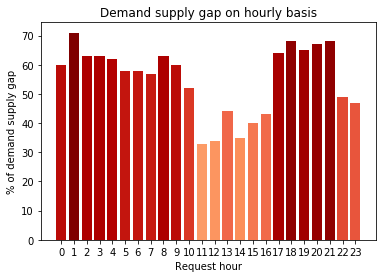

In [22]:
from matplotlib import cm

y=np.array(df_demand_supply['demand supply gap%'])
colors=cm.OrRd(y / float(max(y)))
plt.bar(df_demand_supply['Request hour'],df_demand_supply['demand supply gap%'],color=colors)
plt.xticks(df_demand_supply['Request hour'])
plt.ylabel('% of demand supply gap')
plt.xlabel('Request hour')
plt.title('Demand supply gap on hourly basis');

#### The high color intensity indicates the issue in meeting demand against supply.The uber is meeting demand only in the time period 11am - 4pm. In other time interval the demand is not met properly. There is huge chance for Uber to expand its business.
#### Lets visualize demand supply gap  in city and airport seperately

In [24]:
# Creating demand supply dataframe by including pickup point
df_demand_supply_point = df_time.groupby(['Pickup point','Status','Request hour']).size().unstack('Status').rename_axis([None],axis=1).reset_index()
df_demand_supply_point.fillna(0,inplace=True)
df_demand_supply_point['demand'] = df_demand_supply_point['Cancelled'] + df_demand_supply_point['No Cars Available'] + df_demand_supply_point['Trip Completed']
df_demand_supply_point['demand supply gap'] = df_demand_supply_point['demand'] - df_demand_supply_point['Trip Completed'] 
df_demand_supply_point['demand supply gap%'] = round((df_demand_supply_point['demand supply gap']/df_demand_supply_point['demand']) * 100)
df_demand_supply_point.head()

,Pickup point,Request hour,Cancelled,No Cars Available,Trip Completed,demand,demand supply gap,demand supply gap%
0,Airport,0,0.0,30.0,23.0,53.0,30.0,57.0
1,Airport,1,0.0,29.0,13.0,42.0,29.0,69.0
2,Airport,2,0.0,25.0,16.0,41.0,25.0,61.0
3,Airport,3,0.0,30.0,15.0,45.0,30.0,67.0
4,Airport,4,2.0,34.0,36.0,72.0,36.0,50.0


In [26]:
# demand supply table for airport and city seperately
df_demand_supply_point_Airport = df_demand_supply_point[df_demand_supply_point['Pickup point'] == 'Airport']
df_demand_supply_point_City = df_demand_supply_point[df_demand_supply_point['Pickup point'] == 'City']

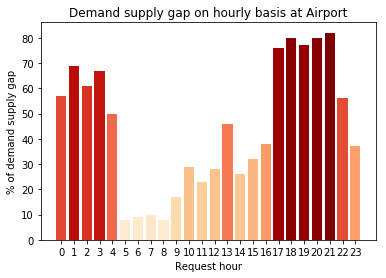

In [27]:
y=np.array(df_demand_supply_point_Airport['demand supply gap%'])
colors=cm.OrRd(y / float(max(y)))
plt.bar(df_demand_supply_point_Airport['Request hour'],df_demand_supply_point_Airport['demand supply gap%'],color=colors)
plt.xticks(df_demand_supply_point_Airport['Request hour'])
plt.ylabel('% of demand supply gap')
plt.xlabel('Request hour')
plt.title('Demand supply gap on hourly basis at Airport');

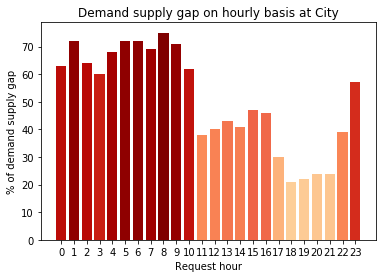

In [28]:
y=np.array(df_demand_supply_point_City['demand supply gap%'])
colors=cm.OrRd(y / float(max(y)))
plt.bar(df_demand_supply_point_City['Request hour'],df_demand_supply_point_City['demand supply gap%'],color=colors)
plt.xticks(df_demand_supply_point_City['Request hour'])
plt.ylabel('% of demand supply gap')
plt.xlabel('Request hour')
plt.title('Demand supply gap on hourly basis at City');

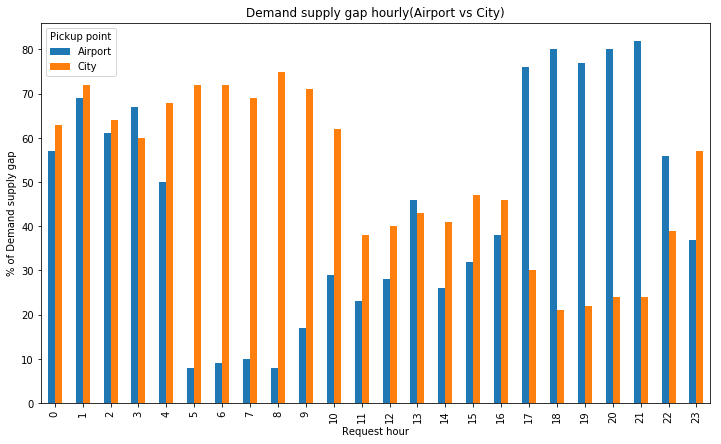

In [29]:
df_demand_supply_point.pivot("Request hour","Pickup point","demand supply gap%").plot(kind='bar',figsize=(12,7),title='Demand supply gap hourly(Airport vs City)').set_ylabel("% of Demand supply gap");

#### As observed earlier from demand supply gap is more in city in the morning 5am - 10am. Demand supply gap is more in airport in the evening time 5pm - 10pm. 
#### We have already seen the reason for this - There may be more outgoing flights in the morning and more incoming flights in the evening.
#### In night from 12am- 5am The demand supply gap is more in both airport and city, as it is generally the sleeping time for most of the drivers.

# Conclusion:

#### The demand for trips to  airport is more in morning which tells that there may be more outgoing flights.
#### The demand for trips to  city from airport is more in evening which tells that there may be more incoming flights.

#### The demand supply gap is more in city in the morning as the drivers are cancelling the requests to Airport. This may be due to reason that the demand in airport is less in the afternoon which makes it difficult to get return trip for those who take trip to airport. So most of the drivers dont want to go to airport in the morning and cancelling the ride.

#### The demand supply gap is more in Airport in the evening as there are no cabs available at the airport in the evening. The demand to airport from the city is less before evening so there will not be more cabs availble at airport in the evening to meet the heavy demand coming in the evening.

# Ways to resolve demand supply gap:

#### Most of the time uber is not able to meet 60 percent of the demand. It has to expand the business by increasing the number of cabs.

#### Uber should make sure that existing drivers should not cancel the requests.The 'Non availablity of cars' in the city is also more in the morning. The drivers should be encoraged to start their trips early in the morning. The drivers who are going to airport should be given more incentives and other freebies so that they will not cancel the rides.

#### The requests that Uber gets from places near to Airport should be given to the drivers at airport instead of drivers with in city.

#### The Uber should introduce a facility to book trips in advance. When users pre book trips, these can be allocated to drivers at Airport who will not get return trip during less demand time.

#### In the evening where demand at airport is more, Uber can keep more XUV's at airport with sharing facility and the cabs that are going to airport in the evening should be of sharing mode, Which can accomodate more passengers while returning from Airport.